In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [2]:
dataset = pd.read_excel("./Real estate valuation data set.xlsx")
dataset = dataset.drop('No', axis=1)

### The basic information of the distribution of every attribute

In [129]:
dataset.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### Show the historgram of every attribute
Easy to get a brief understanding of the distribution of the dataset and find the ourliers.

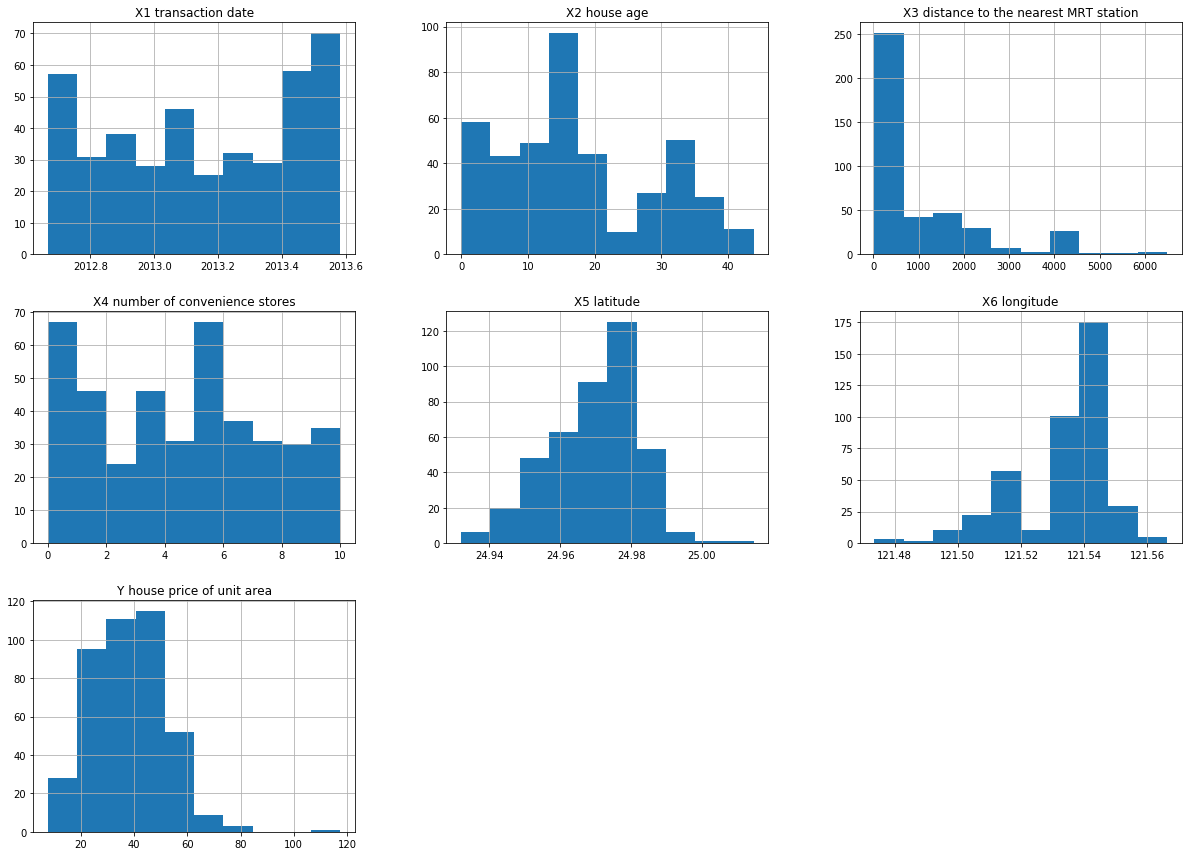

In [22]:
dataset.hist()
plt.tight_layout(rect=(0, 0, 3, 3))
# plt.show()
plt.savefig('./Figures/Historgrams_total1.png', bbox_inches='tight')

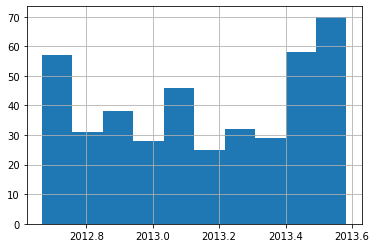

In [8]:
dataset['X1 transaction date'].hist()

### Continours version

In [28]:
dataset.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

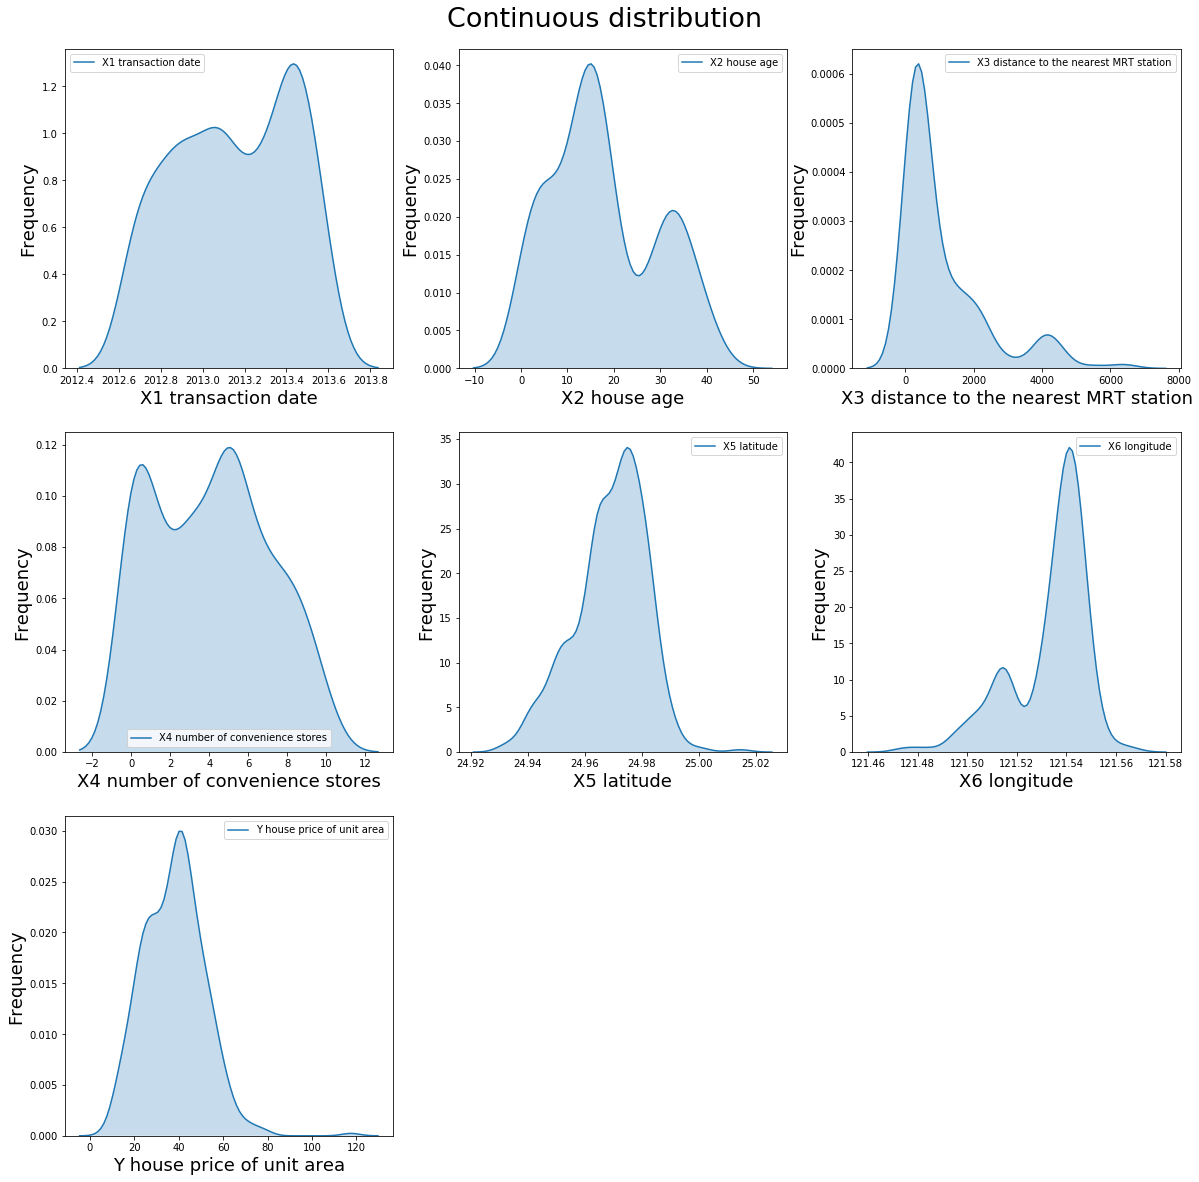

In [49]:
columns = ['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area']

fig, axs = plt.subplots(3, 3, figsize= (20, 20))
title = fig.suptitle("Continuous distribution",y=0.9, va='center',fontsize=27)

# the flag judge whether the attribute is visitied
count=0
for i in range(3):
    for j in range(3):
        if (count <= 6):
            axs[i, j].set_xlabel(columns[count], fontsize=18)
            axs[i, j].set_ylabel("Frequency", fontsize=18)
            sns.kdeplot(dataset[columns[count]], ax=axs[i, j], shade=True)
            count += 1
        else:
            # Hide axis and boarders of the last 2 subplots.
            axs[i, j].spines['top'].set_visible(False)
            axs[i, j].spines['right'].set_visible(False)
            axs[i, j].spines['bottom'].set_visible(False)
            axs[i, j].spines['left'].set_visible(False)
            axs[i, j].axis('off')
plt.savefig("./Figures/Continours_distribution.png")
plt.show()

### Multivariate Analysis
    To check out potential relationships or correlations amongst the different data attributes is to leverage a pair-wise correlation matrix and depict it as a heatmap.

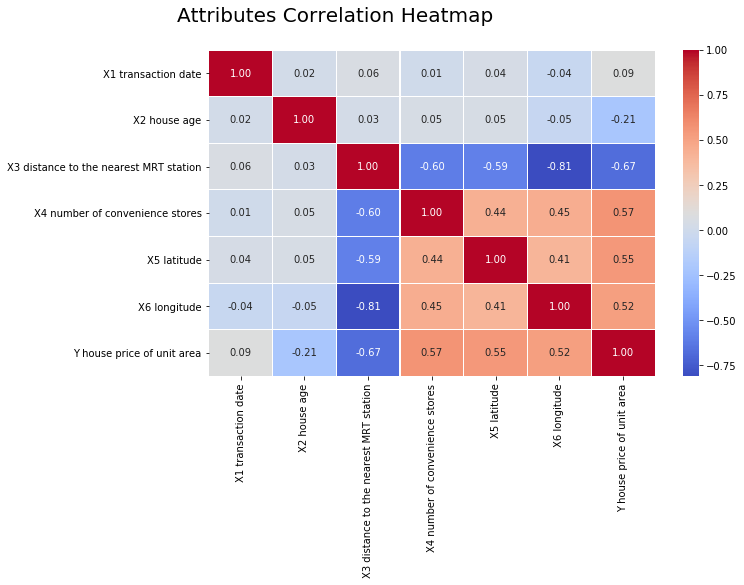

In [58]:
fig, ax = plt.subplots(figsize=(10, 6))
corr = dataset.corr()
hm = sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap="coolwarm",
                 fmt='.2f', linewidths=.05)
fig.subplots_adjust()
title = fig.suptitle("Attributes Correlation Heatmap", x=0.3, fontsize=20)
plt.savefig('./Figures/Heatmap.png', bbox_inches='tight', dpi=500)

    It is effective to know the quartile values and potential outliers by using Box plots and it can depict the numeric data based on the values in different categorical attribute.

In [176]:
# data1 = pd.DataFrame(dataset)
dataset['X1 transaction date'].unique()

array([2012.9166667, 2013.5833333, 2013.5      , 2012.8333333,
       2012.6666667, 2013.4166667, 2013.0833333, 2013.3333333,
       2013.25     , 2012.75     , 2013.       , 2013.1666667])

In [177]:
for i in range(len(dataset['X1 transaction date'].values)):
    t = dataset['X1 transaction date'].values[i]
    if (t >= 2012.9 and t<2013):
            dataset['X1 transaction date'].values[i] = float("%.1f" % t)-0.8
    else:
        dataset['X1 transaction date'].values[i] = float("%.1f" % t)+0.1
    tmp = dataset['X1 transaction date'].values[i]
    dataset['X1 transaction date'].values[i] = float("%.1f" % tmp)

In [180]:
dataset.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

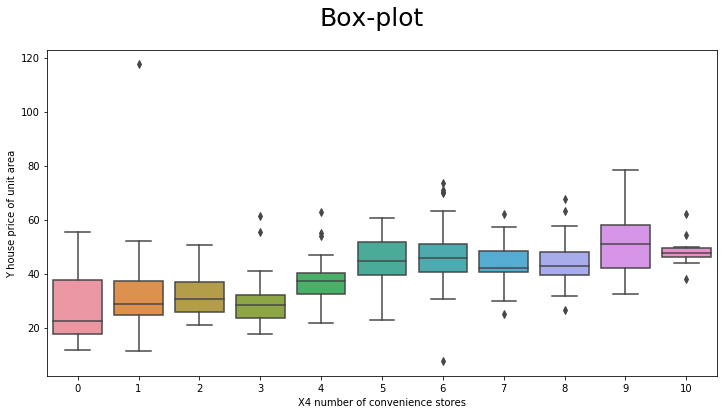

In [183]:
# Only categorical attribute can be used as the x-label.
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
title = fig.suptitle("Box-plot", fontsize=25)
sns.boxplot(x='X4 number of convenience stores', y='Y house price of unit area', data=dataset, ax=ax)
plt.savefig('./Figures/Box-plot_X4.png',bbox_inches='tight', dpi=300)
plt.show()

In [20]:
from sklearn.preprocessing import MinMaxScaler
data_std = MinMaxScaler().fit_transform(dataset)
data_std = pd.DataFrame(data_std, columns=dataset.columns)
d1 = pd.concat([data_std.iloc[:,:2], data_std.iloc[:, 3]],axis=1)
d1 = pd.concat([d1, data_std.iloc[:, 6]], axis=1)

display(dataset)
d1

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


,X1 transaction date,X2 house age,X4 number of convenience stores,Y house price of unit area
0,0.272727,0.730594,1.0,0.275705
1,0.272727,0.445205,0.9,0.314832
2,1.000000,0.303653,0.5,0.361237
3,0.909091,0.303653,0.5,0.429481
4,0.181818,0.114155,0.5,0.323021
...,...,...,...,...
409,0.363636,0.312785,0.0,0.070974
410,0.000000,0.127854,0.9,0.385805
411,0.636364,0.429224,0.7,0.300273
412,0.363636,0.184932,0.5,0.408553


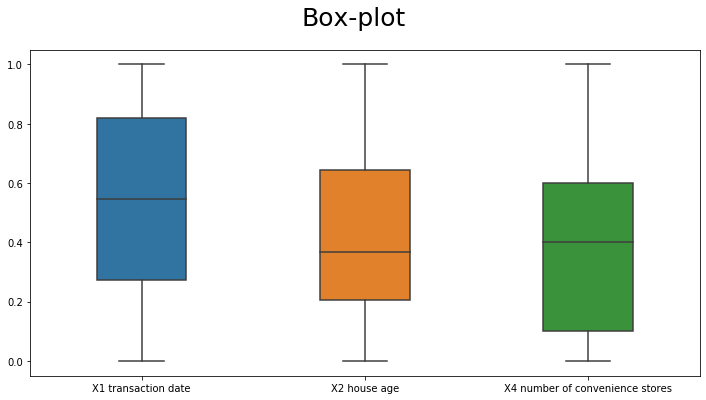

In [24]:
# d1 = pd.concat([dataset.iloc[:,:2], dataset.iloc[:, 3]],axis=1)
# Only categorical attribute can be used as the x-label.
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
title = fig.suptitle("Box-plot", fontsize=25)
sns.boxplot(data=d1.iloc[:, 0:3], ax=ax, width=0.4)
plt.savefig('./Figures/Box-plot_total.png',bbox_inches='tight', dpi=300)
plt.show()

In [168]:
dataset

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.1,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.1,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.7,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.6,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.9,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.1,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.8,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.3,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.1,8.1,104.81010,5,24.96674,121.54067,52.5
